# Forcasting of Product X and Y volume

## 1.importing Libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
import joblib

## 2. Load the dataset

In [11]:
# Load the dataset for analysis
file_path = 'Interview_dataset_ANALYTICS_EXECUTIVE.xlsx'
data = pd.ExcelFile(file_path)
data

In [12]:
df = data.parse('Sheet1')

# Display the first few rows
df.head()

,DateTime,FY,Product- X Vol (000s),Product- Y Vol(000s),X $/Unit,Y $/unit,X conumers Mean Income,Y Consumers Mean Income,Alternative Category % in the market,Counterfeit % in the market
0,2013-05-01,FY 13,652079.4900,62274.96095,0.567842,0.658706,77.820000,72.030000,0.001862,0.196348
1,2013-06-01,FY 13,611646.5390,59483.67820,0.568119,0.658941,79.044167,67.198333,0.003841,0.193263
2,2013-07-01,FY 13,635476.3305,61545.88525,0.570166,0.660020,77.239353,66.547182,0.004032,0.190833
3,2013-08-01,FY 13,626186.9260,60533.70730,0.576185,0.672148,79.067234,67.015250,0.003861,0.191189
4,2013-09-01,FY 13,637616.4575,60135.61650,0.576996,0.673305,78.646856,66.913296,0.003923,0.190546


In [13]:
df.columns

Index(['DateTime', 'FY', 'Product- X Vol (000s)', 'Product- Y  Vol(000s) ',
       'X  $/Unit', 'Y $/unit', 'X conumers Mean Income',
       'Y Consumers Mean Income', 'Alternative Category % in the market',
       'Counterfeit % in the market'],
      dtype='object')

## 3. Renaming columns
Columns were renamed to remove spaces and standardize names, improving code readability and reducing errors during processing.

In [15]:
# Renaming columns to standardize and remove extra spaces
df.rename(columns={
    'Product- X Vol (000s)': 'Product_X_Volume',
    'Product- Y  Vol(000s) ': 'Product_Y_Volume',
    'X  $/Unit': 'X_Price_Per_Unit',
    'Y $/unit': 'Y_Price_Per_Unit',
    'X conumers Mean Income': 'X_Consumers_Mean_Income',
    'Y Consumers Mean Income': 'Y_Consumers_Mean_Income',
    'Alternative Category % in the market': 'Alternative_Category_Percentage',
    'Counterfeit % in the market': 'Counterfeit_Percentage'
}, inplace=True)

df.columns

Index(['DateTime', 'FY', 'Product_X_Volume', 'Product_Y_Volume',
       'X_Price_Per_Unit', 'Y_Price_Per_Unit', 'X_Consumers_Mean_Income',
       'Y_Consumers_Mean_Income', 'Alternative_Category_Percentage',
       'Counterfeit_Percentage'],
      dtype='object')

## 4. Correlation Matrix and Summary of the data

In [14]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Basic statistical summary of the dataset
summary_stats = df.describe()

# Correlation matrix to identify relationships
correlation_matrix = df.corr()


C:\Users\bbsur\AppData\Local\Temp\ipykernel_17040\1220737383.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [18]:
summary_stats

,Product- X Vol (000s),Product- Y Vol(000s),X $/Unit,Y $/unit,X conumers Mean Income,Y Consumers Mean Income,Alternative Category % in the market,Counterfeit % in the market
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,459065.222481,68491.699604,1.087902,1.436181,98.666626,83.635369,0.178478,0.194670
std,137196.425365,12780.554743,0.342278,0.552836,16.443911,17.774600,0.166857,0.072541
min,169993.937500,33939.683595,0.567842,0.658706,77.239353,59.226625,0.001862,0.105206
25%,352503.906250,62213.562500,0.758904,0.927174,82.055094,67.198333,0.035309,0.135652
50%,479329.375000,70291.453150,1.073250,1.353292,97.998680,79.996489,0.105798,0.171103
75%,587822.812500,78931.562500,1.406736,1.965374,113.978967,99.593239,0.311380,0.229890
max,662407.698000,88922.289050,1.747776,2.589542,128.881617,116.395178,0.504019,0.392063


## 5. Plot the time series graph and correlation matrix

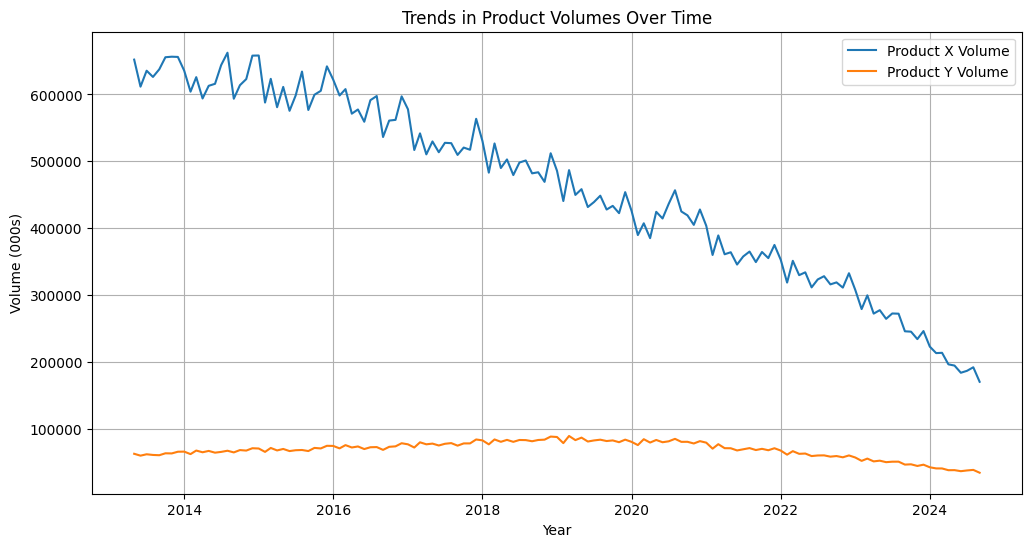

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Product_X_Volume'], label='Product X Volume')
plt.plot(df['DateTime'], df['Product_Y_Volume'], label='Product Y Volume')
plt.title('Trends in Product Volumes Over Time')
plt.xlabel('Year')
plt.ylabel('Volume (000s)')
plt.legend()
plt.grid()
plt.show()



C:\Users\bbsur\AppData\Local\Temp\ipykernel_17040\435223156.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")


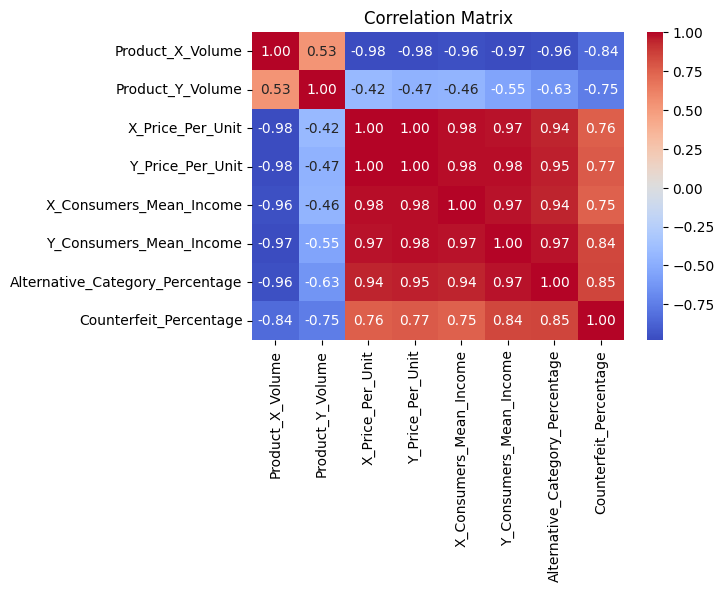

In [76]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


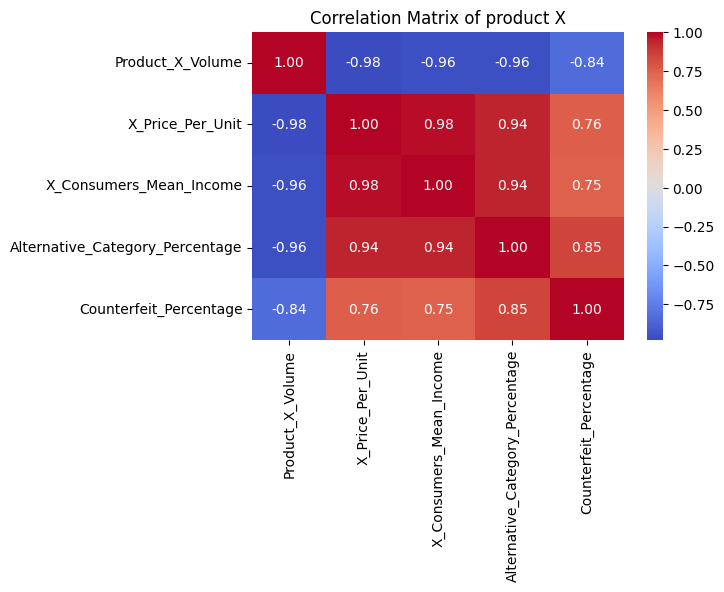

In [65]:
df1= df[['Product_X_Volume','X_Price_Per_Unit', 'X_Consumers_Mean_Income', 'Alternative_Category_Percentage', 'Counterfeit_Percentage']]
plt.figure(figsize=(6, 4))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of product X')
plt.show()

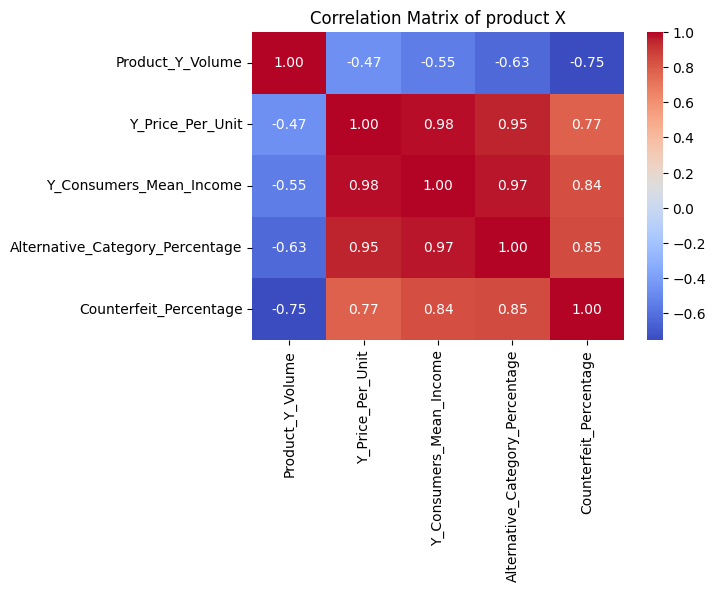

In [66]:
df2= df[['Product_Y_Volume','Y_Price_Per_Unit', 'Y_Consumers_Mean_Income', 'Alternative_Category_Percentage', 'Counterfeit_Percentage']]
plt.figure(figsize=(6,4))
sns.heatmap(df2.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of product X')
plt.show()

## 6. Feature Engineering and setting up parameters
### For Product X:
X_Price_Per_Unit, X_Consumers_Mean_Income, Alternative_Category_Percentage, and Counterfeit_Percentage were selected as predictors. 
### For Product Y:
Alternative_Category_Percentage and Counterfeit_Percentage were selected, considering the minimal direct influence of price and income(less than .60 correlation).

In [77]:

# Define predictors and targetsfor both product X and Y
X = df[['X_Price_Per_Unit', 'X_Consumers_Mean_Income', 'Alternative_Category_Percentage', 'Counterfeit_Percentage']]
y_x = df['Product_X_Volume']
Y = df[[ 'Alternative_Category_Percentage', 'Counterfeit_Percentage']]
y_y = df['Product_Y_Volume']

# Split into training and testing sets for both product X and Y
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X, y_x, test_size=0.2, random_state=42)
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(Y, y_y, test_size=0.2, random_state=42)

# Define the base model
# we are using the 2 different models  
dt = DecisionTreeRegressor(random_state=42)
rid= Ridge()

# Set up the parameter grid for fine-tuning for both product X and Y
param_grid_dt = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [5, 10,  20, 50],
    'min_samples_leaf': [5, 7, 10, 20]
}

param_grid_rid={
    'alpha': [0.1, 1, 10],  # Regularization strength
    'fit_intercept': [True, False]}



## 7. Setup model fit and predict

In [78]:

# Perform grid search for Product X
grid_search_x = GridSearchCV(estimator=rid, param_grid=param_grid_rid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_x.fit(X_train_x, y_train_x)

# Perform grid search for Product Y
grid_search_y = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_y.fit(X_train_y, y_train_y)

# Best parameters and models
best_model_x = grid_search_x.best_estimator_
best_model_y = grid_search_y.best_estimator_

# Predictions using the best models
y_pred_x = best_model_x.predict(X_test_x)
y_pred_y = best_model_y.predict(X_test_y)

# Evaluate the models
rmse_x = mean_squared_error(y_test_x, y_pred_x, squared=False)
mape_x = mean_absolute_percentage_error(y_test_x, y_pred_x)

rmse_y = mean_squared_error(y_test_y, y_pred_y, squared=False)
mape_y = mean_absolute_percentage_error(y_test_y, y_pred_y)

print("Fine-Tuned Model Performance:")
print(f"Product X - RMSE: {rmse_x:.2f}, MAPE: {mape_x:.2%}")
print(f"Product Y - RMSE: {rmse_y:.2f}, MAPE: {mape_y:.2%}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fine-Tuned Model Performance:
Product X - RMSE: 22777.63, MAPE: 4.20%
Product Y - RMSE: 3020.62, MAPE: 3.57%


## 9. Check the model on training data 
By this we can confirm that that there was no major overfitting

In [79]:
# Evaluate the fine-tuned model on training data
train_pred_x = best_model_x.predict(X_train_x)
train_pred_y = best_model_y.predict(X_train_y)

train_rmse_x = mean_squared_error(y_train_x, train_pred_x, squared=False)
train_mape_x = mean_absolute_percentage_error(y_train_x, train_pred_x)

train_rmse_y = mean_squared_error(y_train_y, train_pred_y, squared=False)
train_mape_y = mean_absolute_percentage_error(y_train_y, train_pred_y)

print(f"Training Performance for Product X: RMSE: {train_rmse_x:.2f}, MAPE: {train_mape_x:.2%}")
print(f"Training Performance for Product Y: RMSE: {train_rmse_y:.2f}, MAPE: {train_mape_y:.2%}")


Training Performance for Product X: RMSE: 19466.44, MAPE: 3.88%
Training Performance for Product Y: RMSE: 2447.22, MAPE: 2.94%


## 10. Save the model

In [82]:
# Save the Ridge model (Product X)
joblib.dump(best_model_x, 'ridge_model_x.pkl')

# Save the Decision Tree model (Product Y)
joblib.dump(best_model_y, 'decision_tree_model_y.pkl')

['decision_tree_model_y.pkl']